In [5]:
from SeismicReduction import *
import pickle
import torch.nn as nn

# load data
file_pi2 = open('./pickled/data.pickle', 'rb')
dataholder = pickle.load(file_pi2)
file_pi2.close()

In [7]:
### Processor
processor = Processor(dataholder)
input1 = processor(flatten=[True, 12, 52], normalise=True)

Processor has created an output with shape:  (25351, 2, 64)


In [8]:
bvae = BVaeModel(input1)

ModelAgent initialised


In [ ]:
import copy 

betas = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 3.75, 3.85, 3.95, 4, 4.5, 5, 6, 7, 8, 9, 10]

models = [i for i in range(len(betas))]
ELBO = [i for i in range(len(betas))]

for count, i in enumerate(betas):
        bvae.reduce(epochs=3, hidden_size=2, lr=0.005, beta=i, plot_loss=False)
        bvae.to_2d()
        model = copy.deepcopy(bvae)
        models[count] = model
        print(count + 1, '/', len(betas))

/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


NOTE: embedding already reduced to 2D latent space, UMAP will not be run
1 / 18
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
2 / 18
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
3 / 18
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
4 / 18
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
5 / 18
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
6 / 18
NOTE: embedding already reduced to 2D latent space, UMAP will not be run
7 / 18


In [ ]:
def plot_agent(model, attr='FF', ax=False, count=False):
    ax.set(#xlabel='Latent Variable 1',
#            ylabel='Latent Variable 2',
            title='Beta: {}'.format(
                  betas[count]),
            aspect='equal', xlim=(-5, 5) )

    
    scatter = ax.scatter(model.two_dimensions[:, 0],
                         model.two_dimensions[:, 1],
                         s=1.0,
                         c=model.attributes[attr])

    return scatter


# axes are in a two-dimensional array, indexed by [row, col]
fig, ax = plt.subplots(len(betas)//2, 2, figsize=(24, 12), sharex=False, sharey=False)
fig.suptitle('Beta parameter investigation')
fig.frameon = True

for count, i in enumerate(betas):
    a = plot_agent(models[count], ax=ax[int(count//2),int(count%2)], count=count)

cbar = fig.colorbar(a, ax=ax.ravel().tolist(), shrink=0.7, orientation='vertical')
cbar.set_label(label='AVO anomaly', rotation=90, labelpad=10)


plt.show()

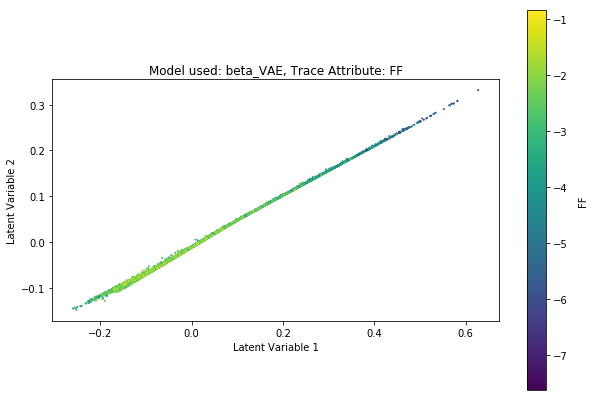

In [21]:
from SeismicReduction import plot_agent as pa
pa(models[-1])

In [31]:
5//2

2